In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import mglearn

C:\Users\songlk2\AppData\Local\Temp\ipykernel_12416\1003470826.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


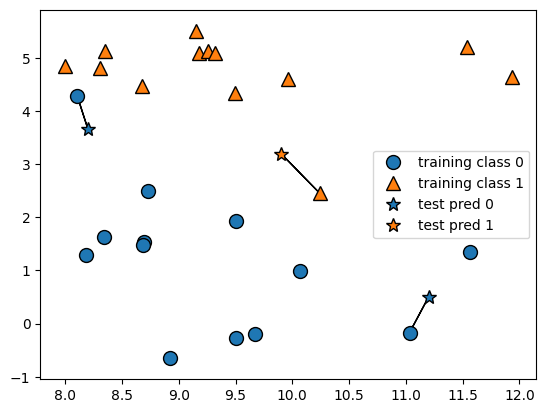

In [2]:
"""
    k近邻（K-NN算法）
    构建模型只需要保存训练数据集即可。
    想要对新数据点做出预测，算法会在训练数据集中找到最近的数据点，也就是它的“最近邻”。
"""
"""
     1.k近邻分类
     k-NN 算法最简单的版本只考虑一个最近邻，也就是与我们想要预测的数据点最近的训练数据点。
     预测结果就是这个训练数据点的已知输出。
     如下是这种分类方法在 forge数据集上的应用：
"""
mglearn.plots.plot_knn_classification(n_neighbors=1)

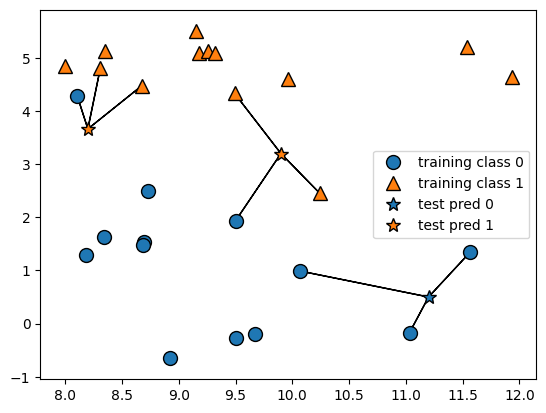

In [3]:
"""
   这里我们添加了 3 个新数据点（用五角星表示）。
   对于每个新数据点，我们标记了训练集中与它最近的点。
   单一最近邻算法的预测结果就是那个点的标签（对应五角星的颜色）。
   
   除了仅考虑最近邻，我还可以考虑任意个（k 个）邻居。
   这也是 k 近邻算法名字的来历。
   在考虑多于一个邻居的情况时，我们用“投票法”（voting）来指定标签。
   也就是说，对于每个测试点，我们数一数多少个邻居属于类别 0，多少个邻居属于类别 1。
   然后将出现次数更多的类别（也就是 k 个近邻中占多数的类别）作为预测结果。
"""
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [4]:
"""
   可以发现，左上角新数据点的预测结果与只用一个邻居时的预测结果不同。
   虽然这张图对应的是一个二分类问题，但方法同样适用于多分类的数据集。
   对于多分类问题，我们数一数每个类别分别有多少个邻居，然后将最常见的类别作为预测结果。
"""

'\n   可以发现，左上角新数据点的预测结果与只用一个邻居时的预测结果不同。\n   虽然这张图对应的是一个二分类问题，但方法同样适用于多分类的数据集。\n   对于多分类问题，我们数一数每个类别分别有多少个邻居，然后将最常见的类别作为预测结果。\n'

In [5]:
"""
    现在看一下如何通过 scikit-learn 来应用 k 近邻算法。
"""
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
# 导入类并将其实例化
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)
# 利用训练集对这个分类器进行拟合。
clf.fit(X_train, y_train)
# 调用 predict 方法来对测试数据进行预测。
print("Test set predictions: {}".format(clf.predict(X_test)))
# 为了评估模型的泛化能力好坏，我们可以对测试数据和测试标签调用 score 方法：
print("Test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))
# 我们的模型精度约为 86%

Test set predictions: [1 0 1 0 1 0 0]
Test set accuracy: 0.86


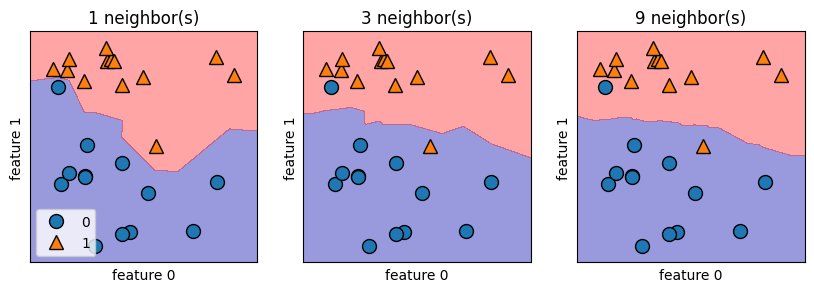

In [6]:
"""
    2.分析KNeighborsClassifier
    对于二维数据集，我们还可以在 xy 平面上画出所有可能的测试点的预测结果。
    我们根据平面中每个点所属的类别对平面进行着色。
    这样可以查看决策边界（decision boundary），即算法对类别 0 和类别 1 的分界线。
    下列代码分别将 1 个、3 个和 9 个邻居三种情况的决策边界可视化
"""
fig, axes = plt.subplots(1, 3, figsize=(10, 3))
for n_neighbors, ax in zip([1, 3, 9], axes):
   # fit方法返回对象本身，所以我们可以将实例化和拟合放在一行代码中
   clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
   mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
   mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
   ax.set_title("{} neighbor(s)".format(n_neighbors))
   ax.set_xlabel("feature 0")
   ax.set_ylabel("feature 1")
axes[0].legend(loc=3)

In [7]:
"""
      从左图可以看出，使用只取单一邻居的KNN算法绘制的决策边界紧跟着训练数据。
      随着邻居个数越来越多，决策边界也越来越平滑。
      更平滑的边界对应更简单的模型。
      换句话说，使用更少的邻居对应更高的模型复杂度，而使用更多的邻居对应更低的模型复杂度。
"""

'\n      从左图可以看出，使用只取单一邻居的KNN算法绘制的决策边界紧跟着训练数据。\n      随着邻居个数越来越多，决策边界也越来越平滑。\n      更平滑的边界对应更简单的模型。\n      换句话说，使用更少的邻居对应更高的模型复杂度，而使用更多的邻居对应更低的模型复杂度。\n'

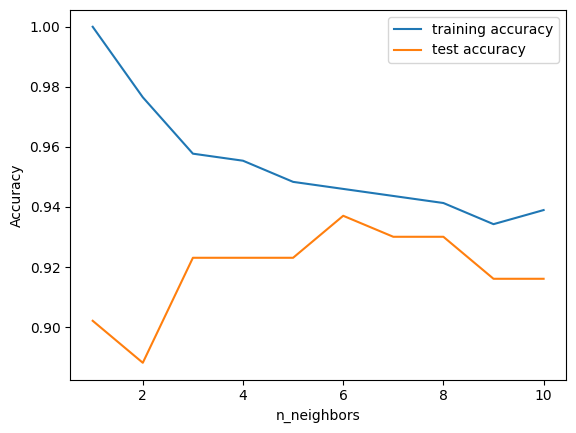

In [8]:
"""
      来研究一下能否证实之前讨论过的模型复杂度和泛化能力之间的关系。
      我们将在现实世界的乳腺癌数据集上进行研究。
      先将数据集分成训练集和测试集，然后用不同的邻居个数对训练集和测试集的性能进行评估。
"""
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
 cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
# n_neighbors取值从1到10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
     # 构建模型
     clf = KNeighborsClassifier(n_neighbors=n_neighbors)
     clf.fit(X_train, y_train)
     # 记录训练集精度
     training_accuracy.append(clf.score(X_train, y_train))
     # 记录泛化精度
     test_accuracy.append(clf.score(X_test, y_test))
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

In [9]:
"""
        图像的 x 轴是 n_neighbors，y 轴是训练集精度和测试集精度。
        仅考虑单一近邻时，训练集上的预测结果十分完美。但随着邻居个数的增多，模型变得更简单，训练集精度也随之下降。
        单一邻居时的测试集精度比使用更多邻居时要低，这表示单一近邻的模型过于复杂。
        与之相反，当考虑 10 个邻居时，模型又过于简单，性能甚至变得更差。最佳性能在中间的某处，邻居个数大约为 6。
"""

'\n        图像的 x 轴是 n_neighbors，y 轴是训练集精度和测试集精度。\n        仅考虑单一近邻时，训练集上的预测结果十分完美。但随着邻居个数的增多，模型变得更简单，训练集精度也随之下降。\n        单一邻居时的测试集精度比使用更多邻居时要低，这表示单一近邻的模型过于复杂。\n        与之相反，当考虑 10 个邻居时，模型又过于简单，性能甚至变得更差。最佳性能在中间的某处，邻居个数大约为 6。\n'

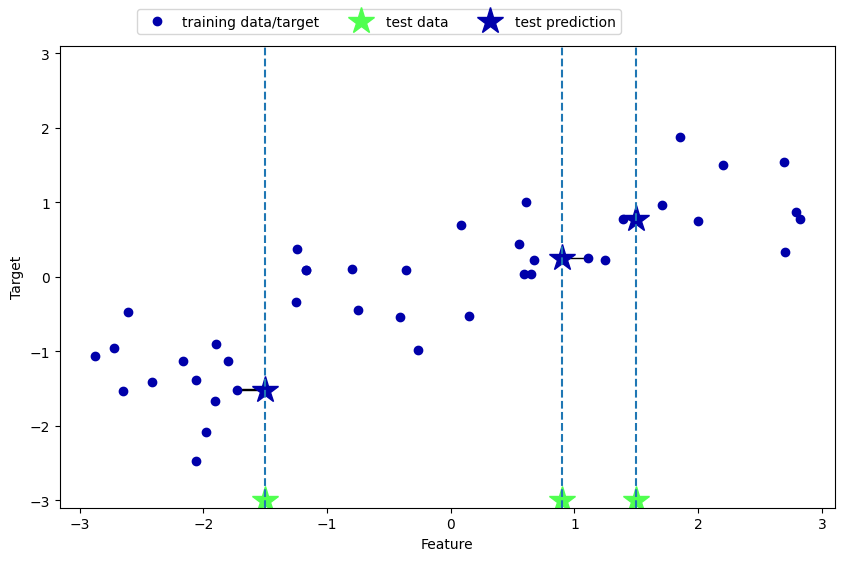

In [10]:
"""
    3.k近邻回归
    k 近邻算法还可以用于回归。
    我们还是先从单一近邻开始，这次使用 wave 数据集。
    我们添加了 3 个测试数据点，在 x 轴上用绿色五角星表示。利用单一邻居的预测结果就是最近邻的目标值。
"""
mglearn.plots.plot_knn_regression(n_neighbors=1)

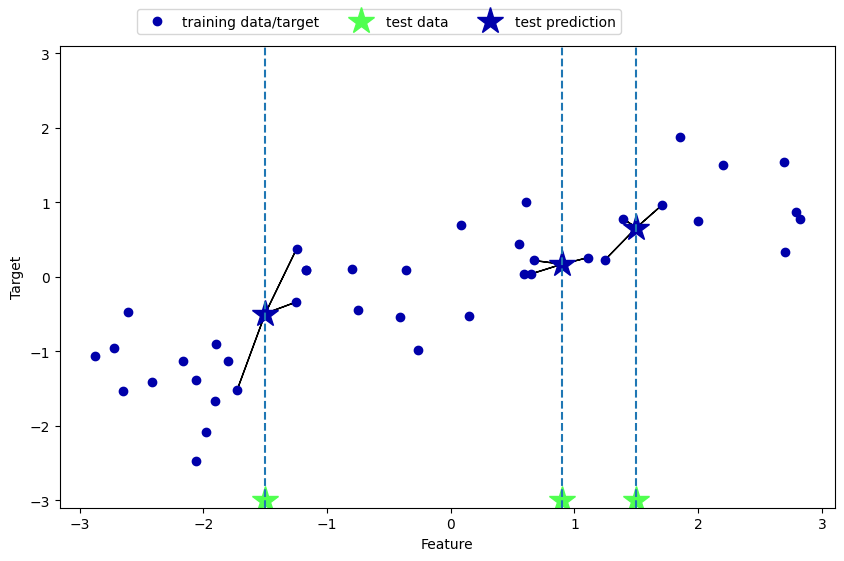

In [11]:
"""
    同样，也可以用多个近邻进行回归。在使用多个近邻时，预测结果为这些邻居的平均值。
"""
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [20]:
"""
    用于回归的 k 近邻算法在 scikit-learn 的 KNeighborsRegressor 类中实现。
    其用法与KNeighborsClassifier 类似：
"""
from sklearn.neighbors import KNeighborsRegressor
X, y = mglearn.datasets.make_wave(n_samples=40)
# 将wave数据集分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
# 模型实例化，并将邻居个数设为3
reg = KNeighborsRegressor(n_neighbors=3)
# 利用训练数据和训练目标值来拟合模型 
reg.fit(X_train, y_train)
# 下面进行预测
print("Test set predictions:\n{}".format(reg.predict(X_test)))

Test set predictions:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [21]:
"""
    还可以用 score 方法来评估模型，对于回归问题，这一方法返回的是 R2 分数。
    R2 分数也叫作决定系数，是回归模型预测的优度度量，位于 0 到 1 之间。
    R2 等于 1 对应完美预测，R2 等于 0 对应常数模型，即总是预测训练集响应（y_train）的平均值：
"""
print("Test set R^2: {:.2f}".format(reg.score(X_test, y_test)))
# 这里的分数是 0.83，表示模型的拟合相对较好。

Test set R^2: 0.83


'\n    从图中可以看出，仅使用单一邻居，训练集中的每个点都对预测结果有显著影响，预测结果的图像经过所有数据点。这导致预测结果非常不稳定。考虑更多的邻居之后，预测结果变得更加平滑，但对训练数据的拟合也不好。\n'

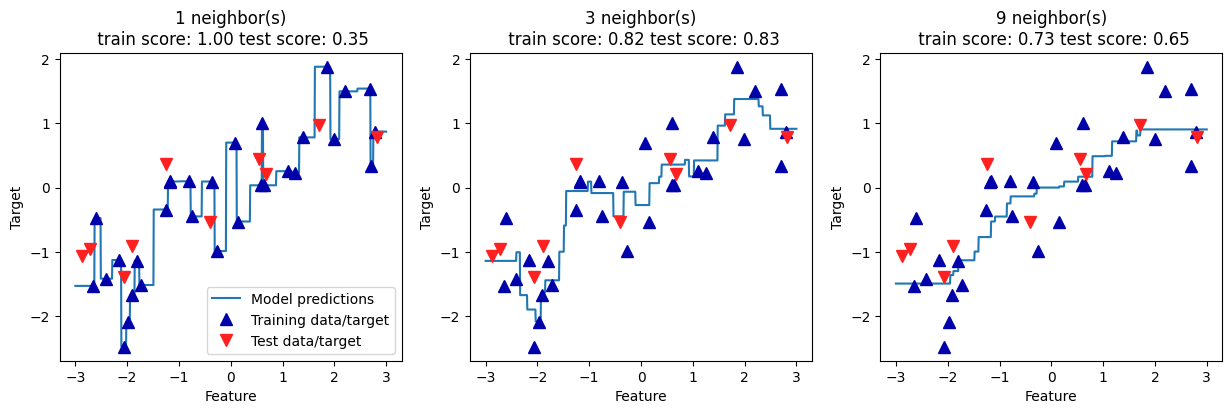

In [14]:
"""
    4. 分析KNeighborsRegressor
"""
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# 创建1000个数据点，在-3和3之间均匀分布
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
     # 利用1个、3个或9个邻居分别进行预测
     reg = KNeighborsRegressor(n_neighbors=n_neighbors)
     reg.fit(X_train, y_train)
     ax.plot(line, reg.predict(line))
     ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
     ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
     ax.set_title(
     "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
     n_neighbors, reg.score(X_train, y_train),
     reg.score(X_test, y_test)))
     ax.set_xlabel("Feature")
     ax.set_ylabel("Target")
axes[0].legend(["Model predictions", "Training data/target",
 "Test data/target"], loc="best")
"""
    从图中可以看出，仅使用单一邻居，训练集中的每个点都对预测结果有显著影响，预测结果的图像经过所有数据点。
    这导致预测结果非常不稳定。
    考虑更多的邻居之后，预测结果变得更加平滑，但对训练数据的拟合也不好。
"""

In [15]:
"""
    5. 优点、缺点和参数
    一般来说，KNeighbors 分类器有 2 个重要参数：邻居个数与数据点之间距离的度量方法。
    在实践中，使用较小的邻居个数（比如 3 个或 5 个）往往可以得到比较好的结果，但你应该调节这个参数。
    默认使用欧式距离，它在许多情况下的效果都很好。
    构建最近邻模型的速度通常很快，但如果训练集很大（特征数很多或者样本数很大），预测速度可能会比较慢。
    使用 k-NN 算法时，对数据进行预处理是很重要的（见第 3 章）。这一算法对于有很多特征（几百或更多）的数据集往往效果不好，对于大多数特征的大多数取值都为 0 的数据集（所谓的稀疏数据集）来说，这一算法的效果尤其不好。
    虽然 k 近邻算法很容易理解，但由于预测速度慢且不能处理具有很多特征的数据集，所以在实践中往往不会用到。
"""

'\n    5. 优点、缺点和参数\n    一般来说，KNeighbors 分类器有 2 个重要参数：邻居个数与数据点之间距离的度量方法。\n    在实践中，使用较小的邻居个数（比如 3 个或 5 个）往往可以得到比较好的结果，但你应该调节这个参数。\n    默认使用欧式距离，它在许多情况下的效果都很好。\n    构建最近邻模型的速度通常很快，但如果训练集很大（特征数很多或者样本数很大），预测速度可能会比较慢。\n    使用 k-NN 算法时，对数据进行预处理是很重要的（见第 3 章）。这一算法对于有很多特征（几百或更多）的数据集往往效果不好，对于大多数特征的大多数取值都为 0 的数据集（所谓的稀疏数据集）来说，这一算法的效果尤其不好。\n    虽然 k 近邻算法很容易理解，但由于预测速度慢且不能处理具有很多特征的数据集，所以在实践中往往不会用到。\n'